### Import 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, MeanShift, DBSCAN
from sklearn.linear_model import LogisticRegression
import os
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.tree import DecisionTreeClassifier
from sklearn import linear_model



# Introduction


The dataset we'll be working with is the Titanic dataset from the Kaggle Introductory Competition.
The following table is a few rows of the data we're working with, bar three variables - Cabin, Ticket, and Name.
Since these are irrelevant, non-quantifiable strings, and/or incomplete data, we discarded these columns.

Initial getDummies and OLS Regression were made by Molly.
Decision Trees were made by Dipika.
PCA and Perceptron were made by Christian.

GetDummies was used on all the columns besides age and fare.
However, for the regression model, we created groups for the Fare column and put them under a new column called FareClass. GetDummies was used on this FareClass column.





### Read Datasets 

In [2]:
#titantic_train = pd.read_csv('/Applications/Desktop Folder/Data/train.csv')
#titantic_test = pd.read_csv('/Applications/Desktop Folder/Data/test.csv')
titantic_train = pd.read_csv(r'C:\Users\subra\OneDrive - Lake Forest College\Lake Forest College Academics\Data Science\titanic\train.csv')
titantic_test = pd.read_csv(r'C:\Users\subra\OneDrive - Lake Forest College\Lake Forest College Academics\Data Science\titanic\test.csv')
#titantic_train = pd.read_csv(r'C:\Users\xtian\Downloads\Comp Sci Class Stuf\CSCI 250\Data Sets\Project #1 Data\titanic_train.csv')
#titantic_test = pd.read_csv(r'C:\Users\xtian\Downloads\Comp Sci Class Stuf\CSCI 250\Data Sets\Project #1 Data\titanic_test.csv')


In [3]:
new_train = titantic_train.drop(['Cabin', 'Ticket','Name'], axis=1)
#new_train = new_train.sort_values(by = ['Pclass','Age'])
new_train.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [4]:
new_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


# Get Dummy Variables  - Molly

In [5]:
df_new = pd.get_dummies(new_train, columns = ['Sex','Pclass'])
#df_new = pd.concat([new_train, df_new], axis=1)
#df_new = df_new.drop(['Sex'], axis=1)
df_new.head(10)

,PassengerId,Survived,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,1,0,22.0,1,0,7.2500,S,0,1,0,0,1
1,2,1,38.0,1,0,71.2833,C,1,0,1,0,0
2,3,1,26.0,0,0,7.9250,S,1,0,0,0,1
3,4,1,35.0,1,0,53.1000,S,1,0,1,0,0
4,5,0,35.0,0,0,8.0500,S,0,1,0,0,1
5,6,0,NaN,0,0,8.4583,Q,0,1,0,0,1
6,7,0,54.0,0,0,51.8625,S,0,1,1,0,0
7,8,0,2.0,3,1,21.0750,S,0,1,0,0,1
8,9,1,27.0,0,2,11.1333,S,1,0,0,0,1
9,10,1,14.0,1,0,30.0708,C,1,0,0,1,0


# Create Age Groups 

In [6]:
bins= [0,2,10,20, 40, 60, 110]
labelage = ['Infant','Kid','Teen', 'Young Adult', 'Old Adult', 'Senior']
new_train['AgeGroup'] = pd.cut(titantic_train['Age'], bins=bins, labels=labelage, right=False)
new_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup
0,1,0,3,male,22.0,1,0,7.2500,S,Young Adult
1,2,1,1,female,38.0,1,0,71.2833,C,Young Adult
2,3,1,3,female,26.0,0,0,7.9250,S,Young Adult
3,4,1,1,female,35.0,1,0,53.1000,S,Young Adult
4,5,0,3,male,35.0,0,0,8.0500,S,Young Adult


# Create Columns for Class and Sex 

In [7]:
df_cl = df_new

df_cl.loc[(df_cl['Sex_female'] ==1) & (df_cl['Pclass_1'] ==1), 'Female_1'] = "TRUE"
df_cl.loc[(df_cl['Sex_female'] ==0) | (df_cl['Pclass_1'] ==0), 'Female_1'] = "FALSE"

df_cl.loc[(df_cl['Sex_female'] ==1) & (df_cl['Pclass_2'] ==1), 'Female_2'] = "TRUE"
df_cl.loc[(df_cl['Sex_female'] ==0) | (df_cl['Pclass_2'] ==0), 'Female_2'] = "FALSE"

df_cl.loc[(df_cl['Sex_female'] ==1) & (df_cl['Pclass_3'] ==1), 'Female_3'] = "TRUE"
df_cl.loc[(df_cl['Sex_female'] ==0) | (df_cl['Pclass_3'] ==0), 'Female_3'] = "FALSE"

df_cl.loc[(df_cl['Sex_male'] ==1) & (df_cl['Pclass_1'] ==1), 'male_1'] = "TRUE"
df_cl.loc[(df_cl['Sex_male'] ==0) | (df_cl['Pclass_1'] ==0), 'male_1'] = "FALSE"

df_cl.loc[(df_cl['Sex_male'] ==1) & (df_cl['Pclass_2'] ==1), 'male_2'] = "TRUE"
df_cl.loc[(df_cl['Sex_male'] ==0) | (df_cl['Pclass_2'] ==0), 'male_2'] = "FALSE"

df_cl.loc[(df_cl['Sex_male'] ==1) & (df_cl['Pclass_3'] ==1), 'male_3'] = "TRUE"
df_cl.loc[(df_cl['Sex_male'] ==0) | (df_cl['Pclass_3'] ==0), 'male_3'] = "FALSE"


df_cl = df_cl.drop(['PassengerId', 'SibSp','Parch','Fare','Embarked','PassengerId','Age','Age'], axis=1)

df_cl.head()

,Survived,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Female_1,Female_2,Female_3,male_1,male_2,male_3
0,0,0,1,0,0,1,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE
1,1,1,0,1,0,0,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE
2,1,1,0,0,0,1,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE
3,1,1,0,1,0,0,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE
4,0,0,1,0,0,1,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE


# Create Sex and Class Codes by Combining Columns 

In [8]:
df_cl['Group'] = df_cl['Female_1'].str.cat(df_cl['Female_2'],sep=" ")
df_cl['Group'] = df_cl['Group'].str.cat(df_cl['Female_3'],sep=" ")
df_cl['Group'] = df_cl['Group'].str.cat(df_cl['male_1'],sep=" ")
df_cl['Group'] = df_cl['Group'].str.cat(df_cl['male_2'],sep=" ")
df_cl['Group'] = df_cl['Group'].str.cat(df_cl['male_3'],sep=" ")

dfcl_new = df_cl.drop(labels = ['Sex_female', 'Sex_male', 'Pclass_1','Pclass_2','Pclass_3'  ,'Female_3'   ,'Female_2'  ,'Female_1'  ,'male_3'  ,'male_1'  ,'male_2' ], axis = 1)

dfcl_new.head(10)

,Survived,Group
0,0,FALSE FALSE FALSE FALSE FALSE TRUE
1,1,TRUE FALSE FALSE FALSE FALSE FALSE
2,1,FALSE FALSE TRUE FALSE FALSE FALSE
3,1,TRUE FALSE FALSE FALSE FALSE FALSE
4,0,FALSE FALSE FALSE FALSE FALSE TRUE
5,0,FALSE FALSE FALSE FALSE FALSE TRUE
6,0,FALSE FALSE FALSE TRUE FALSE FALSE
7,0,FALSE FALSE FALSE FALSE FALSE TRUE
8,1,FALSE FALSE TRUE FALSE FALSE FALSE
9,1,FALSE TRUE FALSE FALSE FALSE FALSE


# Convert Code into Gender and Class 

In [9]:
dfcl_new.loc[(df_cl['Group'] =='TRUE FALSE FALSE FALSE FALSE FALSE') , 'PassengerGroup'] = "Female 1st Class"
dfcl_new.loc[(df_cl['Group'] =='FALSE TRUE FALSE FALSE FALSE FALSE') , 'PassengerGroup'] = "Female 2nd Class"
dfcl_new.loc[(df_cl['Group'] =='FALSE FALSE TRUE FALSE FALSE FALSE') , 'PassengerGroup'] = "Female 3rd Class"
dfcl_new.loc[(df_cl['Group'] =='FALSE FALSE FALSE TRUE FALSE FALSE') , 'PassengerGroup'] = "Male 1st Class"
dfcl_new.loc[(df_cl['Group'] =='FALSE FALSE FALSE FALSE TRUE FALSE') , 'PassengerGroup'] = "Male 2nd Class"
dfcl_new.loc[(df_cl['Group'] =='FALSE FALSE FALSE FALSE FALSE TRUE') , 'PassengerGroup'] = "Male 3rd Class"

dfcl_new.head()

,Survived,Group,PassengerGroup
0,0,FALSE FALSE FALSE FALSE FALSE TRUE,Male 3rd Class
1,1,TRUE FALSE FALSE FALSE FALSE FALSE,Female 1st Class
2,1,FALSE FALSE TRUE FALSE FALSE FALSE,Female 3rd Class
3,1,TRUE FALSE FALSE FALSE FALSE FALSE,Female 1st Class
4,0,FALSE FALSE FALSE FALSE FALSE TRUE,Male 3rd Class


# Decision Tree - Dipika

In [10]:
from sklearn.model_selection import train_test_split
RSEED = 50

In [11]:

traindata = titantic_train.drop(['Cabin', 'Ticket','Name', 'PassengerId'], axis=1)
traindata = pd.get_dummies(traindata, columns = ['Sex','Pclass', 'Embarked'])
traindata = traindata.fillna(traindata.mean())
labels = traindata.Survived #array for actual survival
traindata = traindata.drop(['Survived'], axis=1)###removes survival from array


numTrain = 624
numTest = traindata.shape[0] - numTrain
train = traindata[:numTrain]
train_labels = labels[:numTrain]
test = traindata[numTrain:]
test_labels = labels[numTrain:]

print(test.shape,train.shape,test_labels.shape, train_labels.shape)


(267, 12) (624, 12) (267,) (624,)


In [12]:
# Train tree
tree = DecisionTreeClassifier(random_state=RSEED)
tree.fit(train, train_labels)
print(f'Decision tree has {tree.tree_.node_count} nodes with maximum depth {tree.tree_.max_depth}.')

Decision tree has 275 nodes with maximum depth 17.


In [13]:
# Make probability predictions
train_probs = tree.predict_proba(train)[:, 1]
probs = tree.predict_proba(test)[:, 1]

train_predictions = tree.predict(train)
predictions = tree.predict(test)

In [14]:
# Make probability predictions
train_probs = tree.predict_proba(train)[:, 1]
probs = tree.predict_proba(test)[:, 1]

train_predictions = tree.predict(train)
predictions = tree.predict(test)

In [15]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve

print(f'Train ROC AUC Score: {roc_auc_score(train_labels, train_probs)}')
print(f'Test ROC AUC  Score: {roc_auc_score(test_labels, probs)}')

Train ROC AUC Score: 0.9993063621112401
Test ROC AUC  Score: 0.738821881091618


In [16]:
def evaluate_model(predictions, probs, train_predictions, train_probs):
    """Compare machine learning model to baseline performance.
    Computes statistics and shows ROC curve."""
    
    baseline = {}
    
    baseline['recall'] = recall_score(test_labels, [1 for _ in range(len(test_labels))])
    baseline['precision'] = precision_score(test_labels, [1 for _ in range(len(test_labels))])
    baseline['roc'] = 0.5
    
    results = {}
    
    results['recall'] = recall_score(test_labels, predictions)
    results['precision'] = precision_score(test_labels, predictions)
    results['roc'] = roc_auc_score(test_labels, probs)
    
    train_results = {}
    train_results['recall'] = recall_score(train_labels, train_predictions)
    train_results['precision'] = precision_score(train_labels, train_predictions)
    train_results['roc'] = roc_auc_score(train_labels, train_probs)
    
    for metric in ['recall', 'precision', 'roc']:
        print(f'{metric.capitalize()} Baseline: {round(baseline[metric], 2)} Test: {round(results[metric], 2)} Train: {round(train_results[metric], 2)}')
    
    # Calculate false positive rates and true positive rates
    base_fpr, base_tpr, _ = roc_curve(test_labels, [1 for _ in range(len(test_labels))])
    model_fpr, model_tpr, _ = roc_curve(test_labels, probs)

    plt.figure(figsize = (8, 6))
    plt.rcParams['font.size'] = 16
    
    # Plot both curves
    plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
    plt.plot(model_fpr, model_tpr, 'r', label = 'model')
    plt.legend();
    plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate'); plt.title('ROC Curves');


In [17]:
from collections import Counter
print(Counter(probs))
print(Counter(predictions))

Counter({0.0: 153, 1.0: 104, 0.5: 4, 0.875: 3, 0.25: 3})
Counter({0: 160, 1: 107})


Recall Baseline: 1.0 Test: 0.71 Train: 0.96
Precision Baseline: 0.36 Test: 0.64 Train: 1.0
Roc Baseline: 0.5 Test: 0.74 Train: 1.0


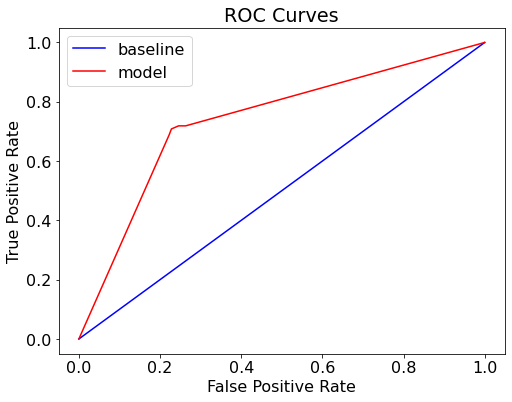

In [18]:
evaluate_model(predictions, probs, train_predictions, train_probs)

In [19]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)

Confusion matrix, without normalization
[[132  39]
 [ 28  68]]


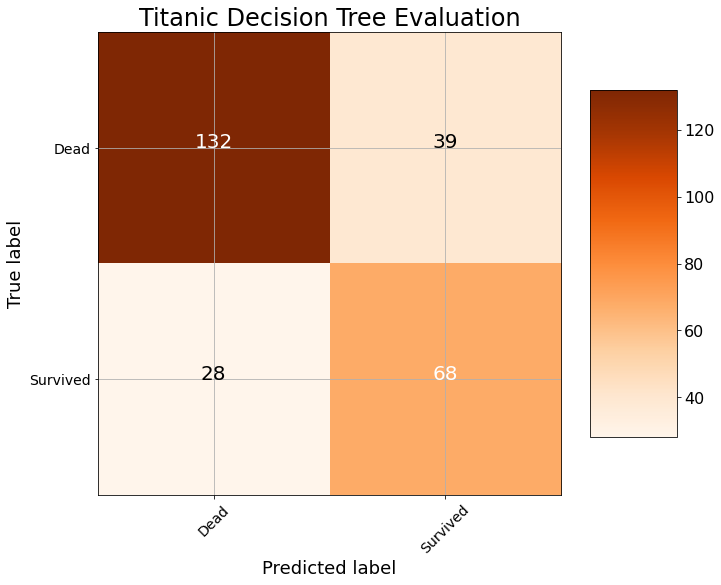

In [20]:
cm = confusion_matrix(test_labels, predictions)
plot_confusion_matrix(cm, classes = ['Dead', 'Survived'],
                      title = 'Titanic Decision Tree Evaluation')

In [21]:
from sklearn.tree import export_graphviz
features = list(train.columns)
fi = pd.DataFrame({'feature': features,
                   'importance': tree.feature_importances_}).\
                    sort_values('importance', ascending = True)
fi.head()

,feature,importance
4,Sex_female,0.000000
10,Embarked_Q,0.000000
9,Embarked_C,0.002875
7,Pclass_2,0.003266
6,Pclass_1,0.014935


In [22]:
### NOW WE TRY WITH TRAIN AND TEST DATASETS

In [23]:
traindata = titantic_train.drop(['Cabin', 'Ticket','Name', 'PassengerId'], axis=1)
traindata = pd.get_dummies(traindata, columns = ['Sex','Pclass', 'Embarked'])
traindata = traindata.fillna(train.mean())
labels = traindata.Survived #array for actual survival
traindata = traindata.drop(['Survived'], axis=1)###removes survival from array



testdata = titantic_test.drop(['Cabin', 'Ticket','Name', 'PassengerId'], axis=1)
testdata = pd.get_dummies(testdata, columns = ['Sex','Pclass', 'Embarked'])
testdata = testdata.fillna(test.mean())




In [24]:
# Train tree
tree = DecisionTreeClassifier(random_state=RSEED)
tree.fit(traindata, labels)
print(f'Decision tree has {tree.tree_.node_count} nodes with maximum depth {tree.tree_.max_depth}.')

Decision tree has 415 nodes with maximum depth 22.


In [25]:
# Make probability predictions
train_probs = tree.predict_proba(traindata)[:, 1]
probs = tree.predict_proba(testdata)[:, 1]

train_predictions = tree.predict(train)
predictions = tree.predict(test)

In [26]:
from sklearn.tree import export_graphviz
features = list(train.columns)
fi = pd.DataFrame({'feature': features,
                   'importance': tree.feature_importances_}).\
                    sort_values('importance', ascending = False)
fi.head()

,feature,importance
5,Sex_male,0.309335
0,Age,0.241271
3,Fare,0.232820
8,Pclass_3,0.079420
1,SibSp,0.050852


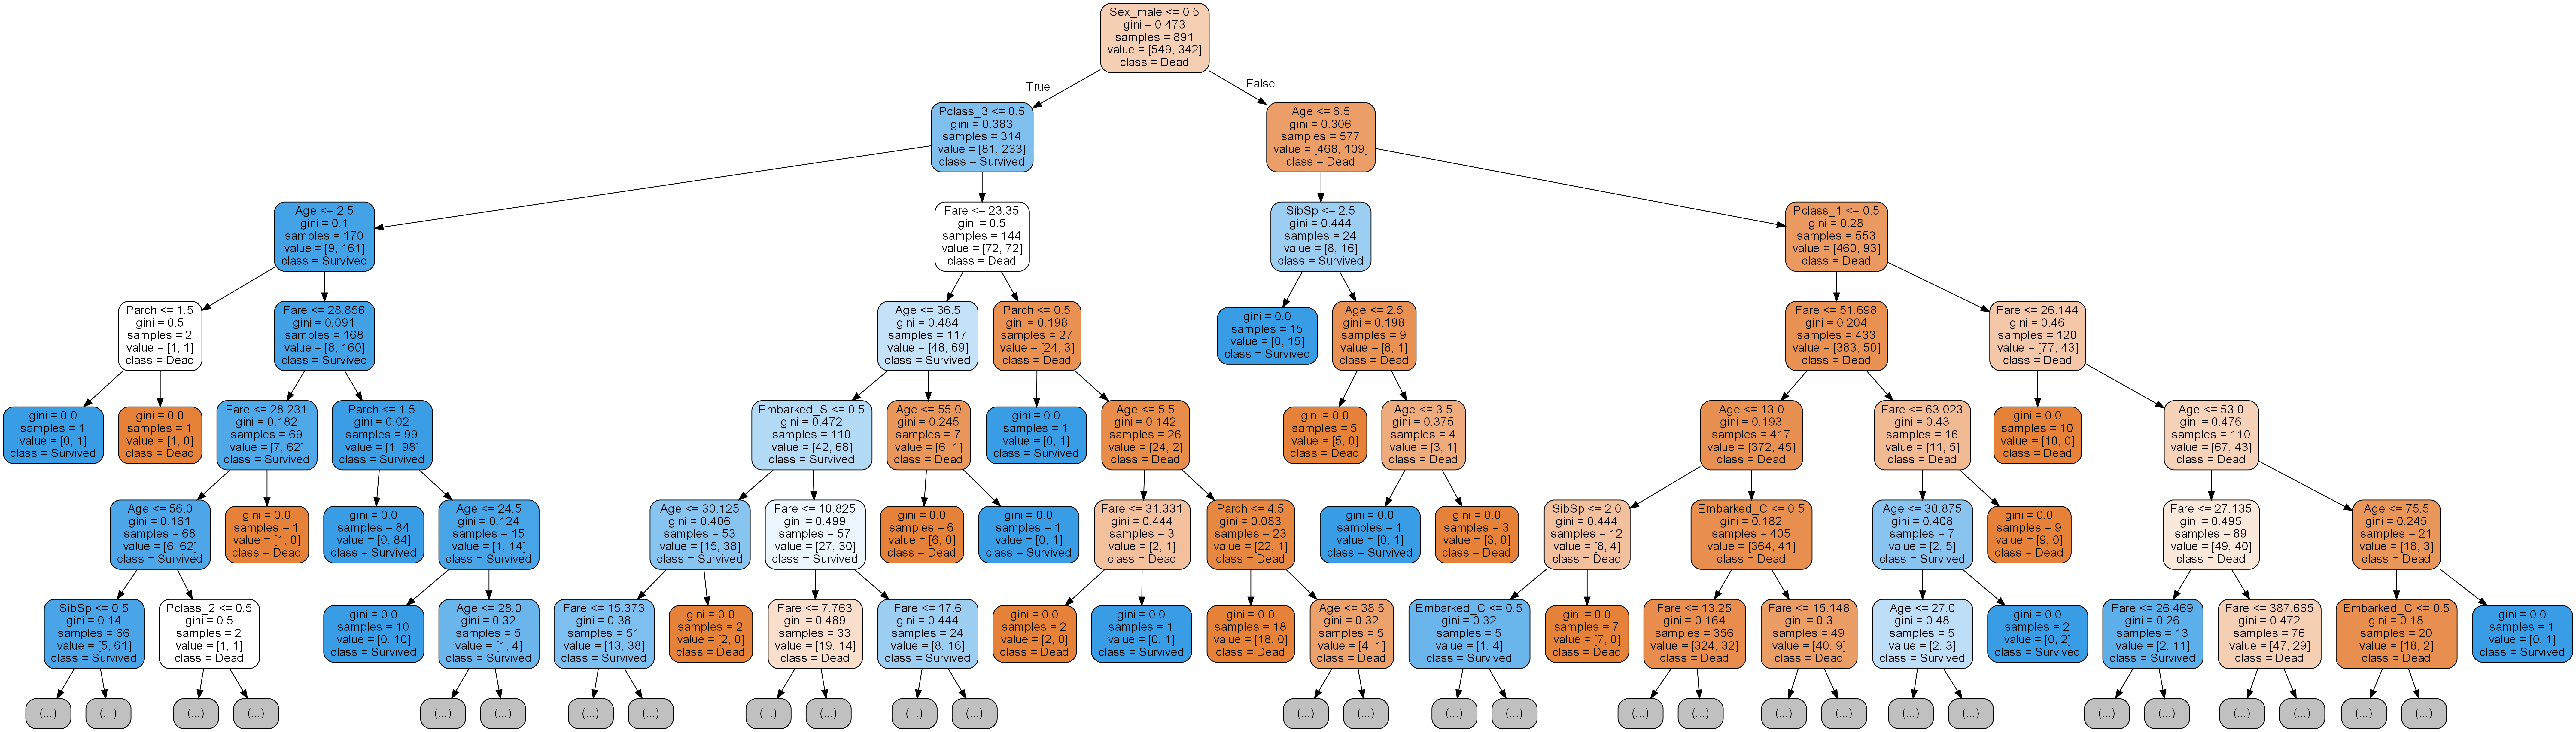

In [27]:
# Save tree as dot file

from subprocess import call
from IPython.display import Image
from sklearn.tree import export_graphviz

# Save tree as dot file 
export_graphviz(tree, 'tree_real_data.dot', rounded = True, 
                feature_names = features, max_depth = 6,
                class_names = ['Dead', 'Survived'], filled = True)

# Convert to png
call(['dot', '-Tpng', 'tree_real_data.dot', '-o', 'tree_real_data.png', '-Gdpi=200'])

# Visualize
Image(filename='tree_real_data.png')

# OLS Regression - Molly 

In [28]:
bins= [0,2,10,20, 40, 60, 110]
labels = [1,2,3, 4, 5, 6]
#1 = infant
#2 = kid
#3 = teen 
#4 = young adult 
#5 = adult 
#6 = senior 
new_train['AgeGroup'] = pd.cut(titantic_train['Age'], bins=bins, labels=labels, right=False)
new_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup
0,1,0,3,male,22.0,1,0,7.2500,S,4
1,2,1,1,female,38.0,1,0,71.2833,C,4
2,3,1,3,female,26.0,0,0,7.9250,S,4
3,4,1,1,female,35.0,1,0,53.1000,S,4
4,5,0,3,male,35.0,0,0,8.0500,S,4


Despite passengers being in first class, they are paying lower fare, so fare isn't an indication of class.

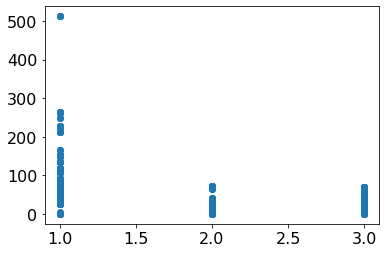

In [29]:
plt.scatter(new_train.Pclass,new_train.Fare)


In [30]:
n_train = new_train
resolution_list = n_train.Fare.value_counts()
resolution_list

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: Fare, Length: 248, dtype: int64

In [31]:
n_train = pd.get_dummies(n_train, columns = ['Sex','Pclass','Embarked','AgeGroup'])
n_train.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,AgeGroup_1,AgeGroup_2,AgeGroup_3,AgeGroup_4,AgeGroup_5,AgeGroup_6
0,1,0,22.0,1,0,7.2500,0,1,0,0,1,0,0,1,0,0,0,1,0,0
1,2,1,38.0,1,0,71.2833,1,0,1,0,0,1,0,0,0,0,0,1,0,0
2,3,1,26.0,0,0,7.9250,1,0,0,0,1,0,0,1,0,0,0,1,0,0
3,4,1,35.0,1,0,53.1000,1,0,1,0,0,0,0,1,0,0,0,1,0,0
4,5,0,35.0,0,0,8.0500,0,1,0,0,1,0,0,1,0,0,0,1,0,0


In [32]:
#n_train = n_train.dropna(subset=['Age', 'Embarked', 'AgeGroup'])
n_train.isna().sum()

PassengerId      0
Survived         0
Age            177
SibSp            0
Parch            0
Fare             0
Sex_female       0
Sex_male         0
Pclass_1         0
Pclass_2         0
Pclass_3         0
Embarked_C       0
Embarked_Q       0
Embarked_S       0
AgeGroup_1       0
AgeGroup_2       0
AgeGroup_3       0
AgeGroup_4       0
AgeGroup_5       0
AgeGroup_6       0
dtype: int64

In [33]:
x = n_train[['Sex_male','SibSp','Pclass_1','Pclass_2', 'Embarked_C','Embarked_Q',
                 'AgeGroup_1','AgeGroup_2','AgeGroup_3','AgeGroup_5','AgeGroup_6','Parch','Fare']]

#x = n_train[['Sex_male','Pclass_1','Pclass_2']]   
y = n_train['Survived']

#1 = infant
#2 = kid
#3 = teen 
#4 = young adult 
#5 = adult 
#6 = senior 

In [34]:
regr = linear_model.LinearRegression()
regr.fit(x, y)
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)

                                 OLS Regression Results                                
Dep. Variable:               Survived   R-squared (uncentered):                   0.496
Model:                            OLS   Adj. R-squared (uncentered):              0.488
Method:                 Least Squares   F-statistic:                              66.40
Date:                Mon, 07 Dec 2020   Prob (F-statistic):                   7.54e-121
Time:                        22:10:14   Log-Likelihood:                         -532.65
No. Observations:                 891   AIC:                                      1091.
Df Residuals:                     878   BIC:                                      1154.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [35]:
nn_train = n_train
nn_train.loc[ nn_train['Fare'] <= 7.91, 'Fareclass']        = 0
nn_train.loc[(nn_train['Fare'] > 7.91) & (nn_train['Fare'] <= 14.454), 'Fareclass'] = 1
nn_train.loc[(nn_train['Fare'] > 14.454) & (nn_train['Fare'] <= 31), 'Fareclass']   = 2
nn_train.loc[ nn_train['Fare'] > 31, 'Fareclass']       = 3
nn_train['Fare'] = nn_train['Fare'].astype(int)

resolution_list = nn_train.Fareclass.value_counts()
resolution_list

2.0    229
0.0    223
3.0    222
1.0    217
Name: Fareclass, dtype: int64

In [36]:
nn_train = pd.get_dummies(nn_train, columns = ['Fareclass'])
nn_train.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Pclass_1,Pclass_2,...,AgeGroup_1,AgeGroup_2,AgeGroup_3,AgeGroup_4,AgeGroup_5,AgeGroup_6,Fareclass_0.0,Fareclass_1.0,Fareclass_2.0,Fareclass_3.0
0,1,0,22.0,1,0,7,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
1,2,1,38.0,1,0,71,1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
2,3,1,26.0,0,0,7,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,4,1,35.0,1,0,53,1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
4,5,0,35.0,0,0,8,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0


In [37]:
x = nn_train[['Sex_male','SibSp','Pclass_1','Pclass_2', 'Embarked_C','Embarked_Q',
                 'AgeGroup_1','AgeGroup_2','AgeGroup_3','AgeGroup_5','AgeGroup_6','Parch','Fareclass_0.0',
                 'Fareclass_1.0','Fareclass_3.0']]
 
y = nn_train['Survived']

In [38]:
regr = linear_model.LinearRegression()
regr.fit(x, y)
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)

                                 OLS Regression Results                                
Dep. Variable:               Survived   R-squared (uncentered):                   0.555
Model:                            OLS   Adj. R-squared (uncentered):              0.548
Method:                 Least Squares   F-statistic:                              72.91
Date:                Mon, 07 Dec 2020   Prob (F-statistic):                   1.40e-142
Time:                        22:10:14   Log-Likelihood:                         -476.75
No. Observations:                 891   AIC:                                      983.5
Df Residuals:                     876   BIC:                                      1055.
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [39]:
n_train = n_train.drop(['Fareclass'], axis=1)
n_train.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,AgeGroup_1,AgeGroup_2,AgeGroup_3,AgeGroup_4,AgeGroup_5,AgeGroup_6
0,1,0,22.0,1,0,7,0,1,0,0,1,0,0,1,0,0,0,1,0,0
1,2,1,38.0,1,0,71,1,0,1,0,0,1,0,0,0,0,0,1,0,0
2,3,1,26.0,0,0,7,1,0,0,0,1,0,0,1,0,0,0,1,0,0
3,4,1,35.0,1,0,53,1,0,1,0,0,0,0,1,0,0,0,1,0,0
4,5,0,35.0,0,0,8,0,1,0,0,1,0,0,1,0,0,0,1,0,0


# Perceptron Section - Christian

In [40]:
class Perceptron:
    
    #Constructor
    def __init__(self,n):
        self.stepsize = 0.01
        self.inputsize = n
        self.weights = np.random.random(n)
        self.bias = n * np.random.random()
        self.inputfeatures = np.matrix.transpose(0*self.weights)
        self.output = 0
        self.numiter = 1000
        
    #Get output
    def getOutput(self):
        return self.output
    
    #Get weights
    def getWeights(self):
        return self.weights
    
    #Get bias
    def getBias(self):
        return self.bias
    
    #Set weights
    def setWeights(self,w):
        self.weights = w
        
    #Set bias
    def setBias(self,b):
        self.bias = b
        
    #Display
    def display(self):
        print('Weights:',self.weights)
        print('Bias:',self.bias)
        
    def check(self,inp):
        if inp.shape[0] != self.inputsize:
            self.output = -1
        else:
            self.inputfeatures = inp
            z = self.bias + np.matmul(self.weights,inp)
            
            #Sigmoid function response
            self.output = 1 / (1 + np.exp(-z))
            
            # Step function response
            #if z > 0:
            #    self.output = 1
            #else:
            #    self.output = 0
        return self
    
    #Train
    def train(self,inp,out):
        if inp.shape[0] != self.inputsize:
            print('Wrong Input Size!!!')
        else:
            self = self.check(inp)
            if self.output != out:
                count = 0
                while count < self.numiter and out != self.output:
                    self.weights = self.weights + self.stepsize*(out - self.output) * np.matrix.transpose(inp)
                    self.bias = self.bias + self.stepsize*(out - self.output)
                    self = self.check(inp)
                    count += 1
            return self

In [41]:
n_train = n_train.fillna(n_train.mean())
n_train = n_train.astype(int)
n_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  891 non-null    int32
 1   Survived     891 non-null    int32
 2   Age          891 non-null    int32
 3   SibSp        891 non-null    int32
 4   Parch        891 non-null    int32
 5   Fare         891 non-null    int32
 6   Sex_female   891 non-null    int32
 7   Sex_male     891 non-null    int32
 8   Pclass_1     891 non-null    int32
 9   Pclass_2     891 non-null    int32
 10  Pclass_3     891 non-null    int32
 11  Embarked_C   891 non-null    int32
 12  Embarked_Q   891 non-null    int32
 13  Embarked_S   891 non-null    int32
 14  AgeGroup_1   891 non-null    int32
 15  AgeGroup_2   891 non-null    int32
 16  AgeGroup_3   891 non-null    int32
 17  AgeGroup_4   891 non-null    int32
 18  AgeGroup_5   891 non-null    int32
 19  AgeGroup_6   891 non-null    int32
dtypes: int32(2

In [42]:
trainlabels = np.asarray(n_train.Survived) #Making an array of all the labels
trainfeatures = np.asarray(n_train) #Making an array of the entire data frame
trainfeatures = trainfeatures[:,2:] #Removing the survival rate and passenger ID so only the features are present.

numTrain = 623
numTest = 268
trainX = trainfeatures[:numTrain]
trainy = trainlabels[:numTrain]
testX = trainfeatures[numTrain:]
testy = trainlabels[numTrain:]

print(testX.shape,trainX.shape,testy.shape, trainy.shape)

(268, 18) (623, 18) (268,) (623,)


In [43]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2,whiten=True)
trainData = pca.fit_transform(trainX)
trainLabels = trainy
testData = pca.transform(testX)
testLabels = testy

print(trainData.shape, trainLabels.shape, testData.shape, testLabels.shape)

(623, 2) (623,) (268, 2) (268,)


# Non-PCA Training

In [44]:
p = Perceptron(18)
NUMTRAIN = trainX.shape[0]

rseq = np.random.permutation(trainData.shape[0]) #trainData.shape[0] = 1000
trainX = trainX[rseq] #Note: rseq probably means random sequence
trainy = trainy[rseq]


t = np.random.randint(10, testX.shape[0])
test = testX[t,:]
gt = testy[t]
print('Real Label:',np.uint8(gt))
test.shape

Real Label: 0


(18,)

In [45]:
## training
import time
print('\nTraining ',end='')
for i in range(NUMTRAIN):
    p = p.train(np.matrix.transpose(trainX[i,:]), trainy[i])
    line = '\rTraining '+ str(i+1) + ' of '+ str(NUMTRAIN)
    print(line, end='')
    time.sleep(0.01)
    

print('\nDone!\n')
p.display();



Training 623 of 623
Done!

Weights: [-0.73772089 -0.7852386  -0.09358023  0.44556227  1.54228188 -1.59737001
  0.68065868  1.23660617 -0.39182468  0.16176484  0.55455041  0.05268465
  0.59849042 -0.37562148  0.07772539  0.03499471  0.57491622  0.67329561]
Bias: 5.113588561432557


In [46]:
p = p.check(test);
print('\nGuessed Label:',np.uint8(p.getOutput()));
print('Desired Label: ',testy[t])


Guessed Label: 0
Desired Label:  0


# PCA Training

In [47]:
q = Perceptron(2)
NUMTRAIN = trainX.shape[0]

rseq = np.random.permutation(trainData.shape[0]) #trainData.shape[0] = 1000
trainData = trainData[rseq] #Note: rseq probably means random sequence
trainLabels = trainLabels[rseq]


t = np.random.randint(10, testData.shape[0])
test = testData[t,:]
gt = testLabels[t]
print('Real Label:',np.uint8(gt))
test.shape

Real Label: 0


(2,)

In [48]:
## training
import time
print('\nTraining ',end='')
for i in range(NUMTRAIN):
    q = q.train(np.matrix.transpose(trainData[i,:]), trainLabels[i])
    line = '\rTraining '+ str(i+1) + ' of '+ str(NUMTRAIN)
    print(line, end='')
    time.sleep(0.01)
    

print('\nDone!\n')
q.display();



Training 623 of 623
Done!

Weights: [ 4.10953594 -3.56392492]
Bias: -0.8714819284137973


In [49]:
q = q.check(test);
print('\nGuessed Label:',np.uint8(q.getOutput()));
print('Desired Label:',testy[t])


Guessed Label: 0
Desired Label: 0


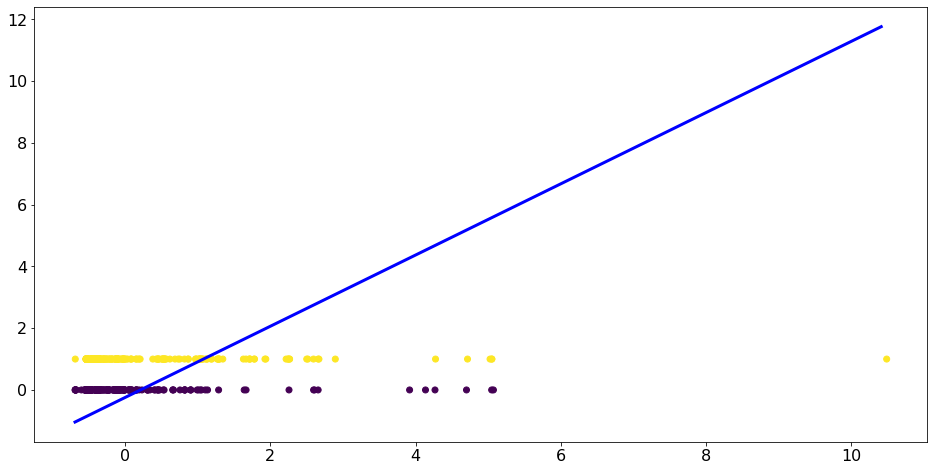

In [50]:
fig=plt.figure(figsize=(16, 8))
plt.scatter(trainData[:,0],trainLabels,c=trainLabels)
w = q.getWeights()
A = w[0]
B = w[1]
C = q.getBias()
x = np.arange(min(trainData[:,0]),max(trainData[:,0]),0.1)
plt.plot(x, (-C/B - x*A/B),color='blue', linewidth=3)
plt.show()


# Conclusion

Decision Tree: The most important features were sex, age, fare, and passenger class. We received a fairly accurate model that received an ROC AUC score of 0.78 for the test data.

OLS Regression: sex, class, port embarked, and age groups are strong influencers on chances of survival. Particularly sex, as males have a lower chance of survival when compared to females

PCA and Perceptron: Running the PCA data with 2 features through the perceptron resulted in a more accurate model than using all 18 features. Meaning there were some "noise" features that may have lead to illusory correlations.




# Future Studies


If we had testLabels for the test Dataset from kaggle, we could train our models using the entire dataset instead of just 70% and get more accuracy from the larger sample.

For the Decision Tree model, we could do Random Forests and further evaluate the dataset. This would give us a model less prone to overfitting and less biased.

We could possibly run regressions in the future testing how various passenger groups’ survival rates are influenced by different variables. Ex: how likely first class male who is a teen to survive when compared to a first class male young adult.

For the perceptron model, we would like to try and determine which features had the most effect on the weights, and the computer's classification decisions in general.
